<a href="https://colab.research.google.com/github/weimarquintero/UDEA-ai4eng-20242/blob/main/03%20-%20modelo%20-%20arboles%20de%20decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Cargando el archivo resultante del proceso de preprocesado.

In [ ]:
#carga del archivo train.csv con pandas
df_train = pd.read_csv('/content/drive/MyDrive/dataFrame_final.csv')
del(df_train["Unnamed: 0"])
df_train.head()
#df_train.shape

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,6.25,0.5,3,1,2
1,3.25,0.0,3,0,0
2,3.25,3.5,3,1,0
3,4.75,0.0,4,1,3
4,3.25,2.5,3,1,1


Trabajando sobre la columna de rendimiento.

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'
df_train = df_train[sorted(df_train.columns)]

X = df_train[[c for c in df_train.columns if c!=y_col]].values
y = df_train[y_col].values
X.shape, y.shape

((692500, 4), (692500,))

Creando el split de entrenamiento y el de test mediante el archivo de train.

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 4), (138500, 4), (554000,), (138500,))

Creando y entrenando el arbol de decision.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(Xtr, ytr)

DecisionTreeClassifier(max_depth=2)

In [ ]:
preds_tr = dt.predict(Xtr)
preds_ts = dt.predict(Xts)
print (preds_tr[:10])
print (preds_ts[:10])

[3 0 0 2 3 2 0 0 2 0]
[3 0 2 2 2 0 2 0 0 0]


In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3388537906137184, 0.3391119133574007)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=9877df0ed56d8ad73565deff0359d2e61ff9c45e2ce8459d10b4a33e9aabfc21
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils


Analizando la matriz de confusion.

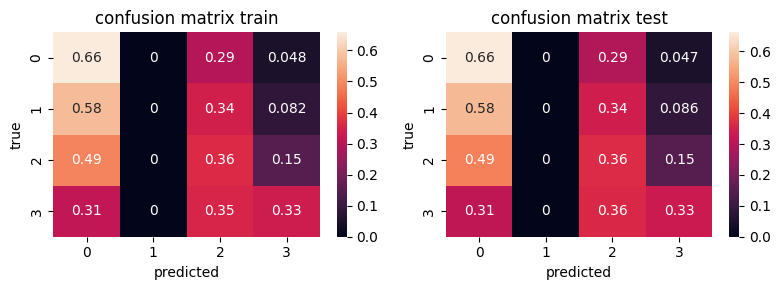

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

In [ ]:
df_train.head()
df_train.shape

(692500, 5)

Eliminando una de las columnas para validar si aporta o no al modelo.

In [ ]:
zh = df_train[['ESTU_VALORMATRICULAUNIVERSIDAD','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET', y_col]]

X = zh[[c for c in zh.columns if c!=y_col]].values
y = zh[y_col].values
X.shape, y.shape

((692500, 3), (692500,))

Creando y entrenando el nuevo arbol de decision con las nuevas columnas.

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(Xtr, ytr)

DecisionTreeClassifier(max_depth=2)

In [ ]:
preds_tr = dt.predict(Xtr)
preds_ts = dt.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3387075812274368, 0.3396967509025271)

validando la matriz de confusion.

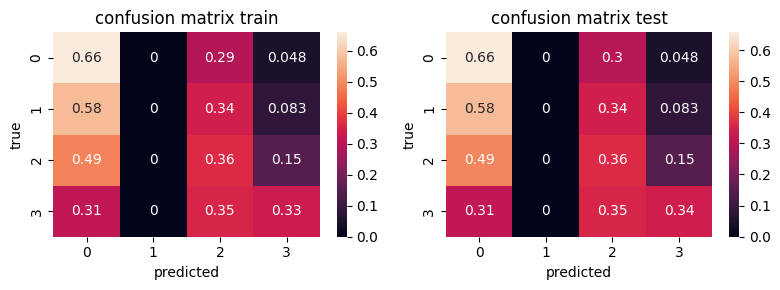

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

Encontramos que el modelo no se ajusta muy bien y los datos y decidimos cambiar de modelo y trabajaremos con un clasificador lineal en el proximo notebook.